In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [3]:
train = pd.read_csv('data/train.csv', parse_dates=['date'])
test = pd.read_csv('data/test.csv', parse_dates=['date'])

train.head()


,row_id,date,country,store,product,num_sold
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240


In [5]:
# min and max date
print("train min date:", train['date'].min())
print("train max date:", train['date'].max())
print("test min date:", test['date'].min())
print("test max date:", test['date'].max())

train min date: 2017-01-01 00:00:00
train max date: 2020-12-31 00:00:00
test min date: 2021-01-01 00:00:00
test max date: 2021-12-31 00:00:00


In [5]:
# train.groupby(['country','store','product'])['num_sold'].mean().unstack().plot(kind='bar',stacked=True)
# plt.show()

In [ ]:
# tmp = train.groupby(['country','store','product'])
# # plot
# # showing only two plots
# plt.figure(figsize=(12,32))
# for i, (country, store, product) in enumerate(tmp.groups.keys()):
#     plt.subplot(len(tmp.groups.keys())//3, 3, i+1)
#     plt.plot(tmp.get_group((country, store, product))['date'], tmp.get_group((country, store, product))['num_sold'])
#     plt.title('{} - {} - {}'.format(country, store, product), fontsize=9)
#     plt.xticks(rotation=45)


    
# plt.subplots_adjust(hspace=1)
# plt.show()



In [ ]:
# tmp = train.groupby(['country','store','product'])
# # get first group
# country, store, product = list(tmp.groups.keys())[0]
# tmp = tmp.get_group((country, store, product))
# tmp = tmp.set_index('date')
# # plot daily sales

# tmp['num_sold']['2019-01-01':'2020-01-01'].plot()
# plt.title('{} - {} - {}'.format(country, store, product), fontsize=9)
# plt.xticks(rotation=45)
# plt.show()



In [7]:
# # december sales
# tmp['num_sold']['2019-12-01':'2020-01-01'].plot()
# plt.title('{} - {} - {}'.format(country, store, product), fontsize=9)
# plt.xticks(rotation=45)
# plt.show()

In [8]:
# # group by store
# plt.figure(figsize=(12,5))
# tmp = train.groupby(['store'])[["num_sold"]].mean()
# tmp.plot(kind='bar')
# plt.show() 

In [9]:
# # gruop by country
# plt.figure(figsize=(12,5))
# tmp = train.groupby(['country'])[["num_sold"]].mean()
# tmp.plot(kind='bar')
# plt.show()

In [10]:
# # end of year
# plt.figure(figsize=(12,5))
# # month == 12 and month == 1
# tmp = train[train['date'].dt.month == 12]
# tmp = tmp.groupby(tmp.date.dt.day)['num_sold'].mean()
# tmp.plot(kind='bar', color='red', label='December', alpha=0.5)
# #
# tmp2 = train[train['date'].dt.month == 1]
# tmp2 = tmp2.groupby(tmp2.date.dt.day)['num_sold'].mean()
# tmp2.plot(kind='bar', color='blue', label='January', alpha=0.5)
# plt.legend()
# plt.show()

In [3]:
weekly_df = train.groupby(["country","store", "product", pd.Grouper(key="date", freq="W")])["num_sold"].sum().rename("num_sold").reset_index()
monthly_df = train.groupby(["country","store", "product", pd.Grouper(key="date", freq="MS")])["num_sold"].sum().rename("num_sold").reset_index()

In [15]:
# def plot_all(df):
#     # subplots
#     fig, ax = plt.subplots(2, 2, figsize=(20, 15),sharex = True, sharey=True)
#     # tight layout
#     plt.tight_layout()
#     # unique products
#     products = df['product'].unique()
#     # loop over products
#     for i, product in enumerate(products):
#         # get data
#         tmp = df[df['product'] == product]
#         # plot
#         sns.lineplot(x='date', y='num_sold', data=tmp, ax=ax[i//2, i%2],hue="country", style="store")
#         ax[i//2, i%2].set_title(product)
        

# plot_all(weekly_df)

In [19]:
# plot_all(monthly_df)

Year 2020 is different
Pattern in sales between all countries and stores are identical

In [66]:
kk=train.groupby(['country', 'store', 'product']).num_sold.mean().unstack(level='store')
kk['KaggleMart:KaggleRama']= kk['KaggleMart']/kk['KaggleRama']
weights = {'KaggleMart': 2.8}
kk

store                                     KaggleMart  KaggleRama  \
country product                                                    
Belgium Kaggle Advanced Techniques        405.895962  140.880219   
        Kaggle Getting Started            325.649555  113.041068   
        Kaggle Recipe Book                243.922656   84.738535   
        Kaggle for Kids: One Smart Goose  437.316222  152.080767   
France  Kaggle Advanced Techniques        366.978097  127.389459   
        Kaggle Getting Started            294.089665  101.869268   
        Kaggle Recipe Book                220.158795   76.188912   
        Kaggle for Kids: One Smart Goose  395.650240  137.264203   
Germany Kaggle Advanced Techniques        406.429158  141.444216   
        Kaggle Getting Started            325.702259  113.268309   
        Kaggle Recipe Book                244.533881   84.728268   
        Kaggle for Kids: One Smart Goose  439.027379  152.063655   
Italy   Kaggle Advanced Techniques        321.937029  111.344969   
        Kaggle Getting Started            257.516769   89.260096   
        Kaggle Recipe Book                192.754278   66.808350   
        Kaggle for Kids: One Smart Goose  346.918549  120.025325   
Poland  Kaggle Advanced Techniques        195.466119   67.574264   
        Kaggle Getting Started            156.626283   54.306639   
        Kaggle Recipe Book                117.302533   40.559890   
        Kaggle for Kids: One Smart Goose  212.738535   73.663244   
Spain   Kaggle Advanced Techniques        292.252567  101.333333   
        Kaggle Getting Started            234.632444   81.130732   
        Kaggle Recipe Book                175.963039   60.702943   
        Kaggle for Kids: One Smart Goose  315.420945  109.705681   

store                                     KaggleMart:KaggleRama  
country product                                                  
Belgium Kaggle Advanced Techniques                     2.881142  
        Kaggle Getting Started                         2.880807  
        Kaggle Recipe Book                             2.878533  
        Kaggle for Kids: One Smart Goose               2.875552  
France  Kaggle Advanced Techniques                     2.880757  
        Kaggle Getting Started                         2.886932  
        Kaggle Recipe Book                             2.889644  
        Kaggle for Kids: One Smart Goose               2.882399  
Germany Kaggle Advanced Techniques                     2.873424  
        Kaggle Getting Started                         2.875493  
        Kaggle Recipe Book                             2.886096  
        Kaggle for Kids: One Smart Goose               2.887129  
Italy   Kaggle Advanced Techniques                     2.891348  
        Kaggle Getting Started                         2.885016  
        Kaggle Recipe Book                             2.885182  
        Kaggle for Kids: One Smart Goose               2.890378  
Poland  Kaggle Advanced Techniques                     2.892612  
        Kaggle Getting Started                         2.884109  
        Kaggle Recipe Book                             2.892082  
        Kaggle for Kids: One Smart Goose               2.887988  
Spain   Kaggle Advanced Techniques                     2.884071  
        Kaggle Getting Started                         2.892029  
        Kaggle Recipe Book                             2.898756  
        Kaggle for Kids: One Smart Goose               2.875156

In [106]:
kk = train.groupby(['country', 'store', 'product']).num_sold.mean().unstack(level='country')
# proportion of sales in each country
kk['Belgium:France'] = kk['Belgium']/kk['France']
kk['Belgium:Germany'] = kk['Belgium']/kk['Germany']
kk['Belgium:Spain'] = kk['Belgium']/kk['Spain']
kk['Belgium:Poland'] = kk['Belgium']/kk['Poland']
kk['Belgium:Italy'] = kk['Belgium']/kk['Italy']
weight2 = {'France': 1.10, 'Germany': 0.998, 'Spain': 1.388, 'Poland': 2.076, 'Italy': 1.26}


In [98]:
weights

{'Kaggle Getting Started': 1.246,
 'Kaggle Recipe Book': 0.928,
 'France': 1.1,
 'Germany': 0.998,
 'Spain': 1.388,
 'Poland': 2.076,
 'Italy': 1.26}

In [64]:
kk


country                                         Belgium      France  \
store      product                                                    
KaggleMart Kaggle Advanced Techniques        405.895962  366.978097   
           Kaggle Getting Started            325.649555  294.089665   
           Kaggle Recipe Book                243.922656  220.158795   
           Kaggle for Kids: One Smart Goose  437.316222  395.650240   
KaggleRama Kaggle Advanced Techniques        140.880219  127.389459   
           Kaggle Getting Started            113.041068  101.869268   
           Kaggle Recipe Book                 84.738535   76.188912   
           Kaggle for Kids: One Smart Goose  152.080767  137.264203   

country                                         Germany       Italy  \
store      product                                                    
KaggleMart Kaggle Advanced Techniques        406.429158  321.937029   
           Kaggle Getting Started            325.702259  257.516769   
           Kaggle Recipe Book                244.533881  192.754278   
           Kaggle for Kids: One Smart Goose  439.027379  346.918549   
KaggleRama Kaggle Advanced Techniques        141.444216  111.344969   
           Kaggle Getting Started            113.268309   89.260096   
           Kaggle Recipe Book                 84.728268   66.808350   
           Kaggle for Kids: One Smart Goose  152.063655  120.025325   

country                                          Poland       Spain  \
store      product                                                    
KaggleMart Kaggle Advanced Techniques        195.466119  292.252567   
           Kaggle Getting Started            156.626283  234.632444   
           Kaggle Recipe Book                117.302533  175.963039   
           Kaggle for Kids: One Smart Goose  212.738535  315.420945   
KaggleRama Kaggle Advanced Techniques         67.574264  101.333333   
           Kaggle Getting Started             54.306639   81.130732   
           Kaggle Recipe Book                 40.559890   60.702943   
           Kaggle for Kids: One Smart Goose   73.663244  109.705681   

country                                      Belgium:France  Belgium:Germany  \
store      product                                                             
KaggleMart Kaggle Advanced Techniques              1.106050         0.998688   
           Kaggle Getting Started                  1.107314         0.999838   
           Kaggle Recipe Book                      1.107940         0.997500   
           Kaggle for Kids: One Smart Goose        1.105310         0.996102   
KaggleRama Kaggle Advanced Techniques              1.105902         0.996013   
           Kaggle Getting Started                  1.109668         0.997994   
           Kaggle Recipe Book                      1.112216         1.000121   
           Kaggle for Kids: One Smart Goose        1.107942         1.000113   

country                                      Belgium:Spain  Belgium:Poland  \
store      product                                                           
KaggleMart Kaggle Advanced Techniques             1.388853        2.076554   
           Kaggle Getting Started                 1.387914        2.079150   
           Kaggle Recipe Book                     1.386215        2.079432   
           Kaggle for Kids: One Smart Goose       1.386453        2.055651   
KaggleRama Kaggle Advanced Techniques             1.390265        2.084821   
           Kaggle Getting Started                 1.393320        2.081533   
           Kaggle Recipe Book                     1.395954        2.089220   
           Kaggle for Kids: One Smart Goose       1.386262        2.064541   

country                                      Belgium:Italy  
store      product                                          
KaggleMart Kaggle Advanced Techniques             1.260793  
           Kaggle Getting Started                 1.264576  
           Kaggle Recipe Book            

In [111]:
# proportion of sales for each product
kk = train.groupby(['country', 'store', 'product']).num_sold.mean().unstack(level='product')
unique_products = train['product'].unique()
for i in range(1,len(unique_products)):
    kk[unique_products[0]+':'+unique_products[i]] = kk[unique_products[0]]/kk[unique_products[i]]
weight3 = {"Kaggle Getting Started": 1.246, "Kaggle Recipe Book":1.66 ,"Kaggle for Kids: One Smart Goose":0.928}
kk

product             Kaggle Advanced Techniques  Kaggle Getting Started  \
country store                                                            
Belgium KaggleMart                  405.895962              325.649555   
        KaggleRama                  140.880219              113.041068   
France  KaggleMart                  366.978097              294.089665   
        KaggleRama                  127.389459              101.869268   
Germany KaggleMart                  406.429158              325.702259   
        KaggleRama                  141.444216              113.268309   
Italy   KaggleMart                  321.937029              257.516769   
        KaggleRama                  111.344969               89.260096   
Poland  KaggleMart                  195.466119              156.626283   
        KaggleRama                   67.574264               54.306639   
Spain   KaggleMart                  292.252567              234.632444   
        KaggleRama                  101.333333               81.130732   

product             Kaggle Recipe Book  Kaggle for Kids: One Smart Goose  \
country store                                                              
Belgium KaggleMart          243.922656                        437.316222   
        KaggleRama           84.738535                        152.080767   
France  KaggleMart          220.158795                        395.650240   
        KaggleRama           76.188912                        137.264203   
Germany KaggleMart          244.533881                        439.027379   
        KaggleRama           84.728268                        152.063655   
Italy   KaggleMart          192.754278                        346.918549   
        KaggleRama           66.808350                        120.025325   
Poland  KaggleMart          117.302533                        212.738535   
        KaggleRama           40.559890                         73.663244   
Spain   KaggleMart          175.963039                        315.420945   
        KaggleRama           60.702943                        109.705681   

product             Kaggle Advanced Techniques:Kaggle Getting Started  \
country store                                                           
Belgium KaggleMart                                           1.246420   
        KaggleRama                                           1.246275   
France  KaggleMart                                           1.247844   
        KaggleRama                                           1.250519   
Germany KaggleMart                                           1.247855   
        KaggleRama                                           1.248754   
Italy   KaggleMart                                           1.250159   
        KaggleRama                                           1.247422   
Poland  KaggleMart                                           1.247978   
        KaggleRama                                           1.244309   
Spain   KaggleMart                                           1.245576   
        KaggleRama                                           1.249013   

product             Kaggle Advanced Techniques:Kaggle Recipe Book  \
country store                                                       
Belgium KaggleMart                                       1.664036   
        KaggleRama                                       1.662528   
France  KaggleMart                                       1.666879   
        KaggleRama                                       1.672021   
Germany KaggleMart                                       1.662057   
        KaggleRama                                       1.669386   
Italy   KaggleMart                                       1.670194   
        KaggleRama                                       1.666633   
Poland  KaggleMart                                       1.666342   
        KaggleRama                                       1.666037   
Spain   KaggleMart                             

In [105]:
weights

{'Kaggle Getting Started': 1.246,
 'Kaggle Recipe Book': 0.928,
 'France': 1.1,
 'Germany': 0.998,
 'Spain': 1.388,
 'Poland': 2.076,
 'Italy': 1.26}

In [6]:
tmp = train.groupby(['date'])['num_sold'].sum()
# plot 


In [72]:
# linear regression
from sklearn.linear_model import LinearRegression
def smape(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred))) * 200

In [93]:
def feature_eng(df):
    new_df = df.copy()
    # date features
    new_df['year'] = new_df['date'].dt.year
    new_df['month'] = new_df['date'].dt.month
    new_df['day'] = new_df['date'].dt.dayofyear
    new_df['day_of_week'] = new_df['date'].dt.dayofweek
    # sin and cos
    new_df['sin_month'] = np.sin(2 * np.pi * new_df['month']/12)
    new_df['cos_month']      = np.cos(2 * np.pi * new_df['month']/12)
    new_df["day_of_week"] = new_df["day_of_week"].apply(lambda x: 0 if x<=3 else(1 if x==4 else (2 if x==5 else (3))))
    new_df = new_df.drop(columns=['date',"month"])
    return new_df
train_df = feature_eng(tmp)
train_df.head()
features = [col for col in train_df.columns if col not in ['row_id' ,	'country', 	'store' ,	'product','mum_sold']]
X = train_df[features]
y = train_df['num_sold']



In [91]:
# time series cross validatio   
from sklearn.model_selection import TimeSeriesSplit
# mean squared error
from sklearn.metrics import mean_squared_error
tscv = TimeSeriesSplit(n_splits=5)
scores = {"RMSE":0, "SMAPE":0}

for train_index, test_index in tscv.split(X):
    print("TRAINing:")
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # model
    model = LinearRegression()
    model.fit(X_train, y_train)
    # predict
    y_pred = model.predict(X_test)
    # score
    scores['RMSE'] += np.sqrt(mean_squared_error(y_test, y_pred))
    scores['SMAPE'] += smape(y_test, y_pred)
# average scores
for key in scores:
    scores[key] /= 5
print(scores)


ValueError: Cannot have number of folds=6 greater than the number of samples=0.

In [113]:
# train on full data
model = LinearRegression()
model.fit(X, y)
# predict
y_pred = model.predict(X)
pred = pd.DataFrame({'date':tmp['date'], 'num_sold':y_pred})
# add country store and product columns
pred['country'] = 'Belgium'
pred['store'] = 'KaggleRama'
pred['product'] = 'Kaggle Advanced Techniques'
# multiply by 2.28 to get kagglemart
mart_pred = pred.copy()
mart_pred['store'] = 'KaggleMart'
mart_pred['num_sold'] = mart_pred['num_sold'] * 2.88
# merge
pred = pd.concat([pred, mart_pred])
# countries
countries = ['France', 'Germany', 'Spain', 'Poland', 'Italy']
for country in countries:
    tmp2 = pred.copy()
    tmp2['country'] = country
    tmp2['num_sold'] = tmp2['num_sold'] * weight2[country]
    pred = pd.concat([pred, tmp2])
products = ['Kaggle Getting Started', 'Kaggle Recipe Book', 'Kaggle for Kids: One Smart Goose']
for product in products:
    tmp2 = pred.copy()
    tmp2['product'] = product
    tmp2['num_sold'] = tmp2['num_sold'] * weight3[product]
    pred = pd.concat([pred, tmp2])
    
model.score(X, y)

1.0

Text(0.5, 1.0, 'France - KaggleMart - Kaggle Advanced Techniques')

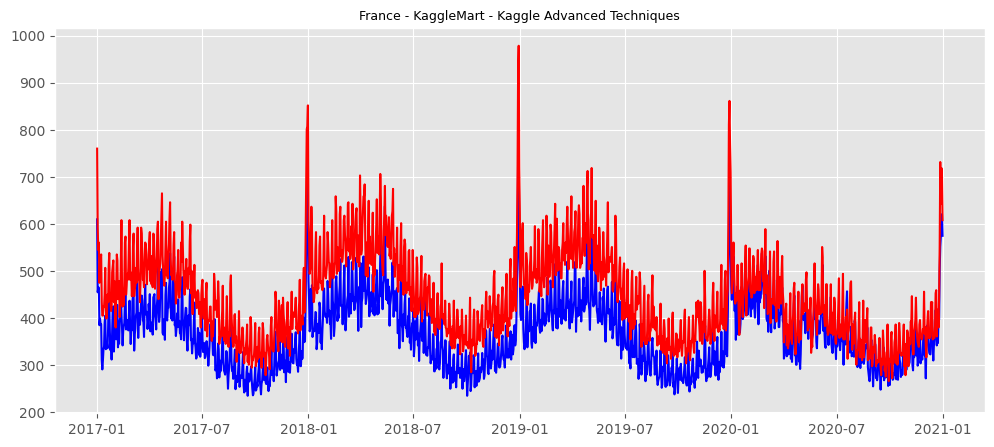

In [114]:
tmp2 = train[(train['country'] == 'France') & (train['store'] == 'KaggleMart') & (train['product'] == 'Kaggle Advanced Techniques')]
pred2 = pred[(pred['country'] == 'France') & (pred['store'] == 'KaggleMart') & (pred['product'] == 'Kaggle Advanced Techniques')]
plt.figure(figsize=(12,5))
plt.plot(tmp2['date'], tmp2['num_sold'], label='actual', color='blue')
plt.plot(pred2['date'], pred2['num_sold'], label='predicted', color='red')
plt.title('France - KaggleMart - Kaggle Advanced Techniques', fontsize=9)

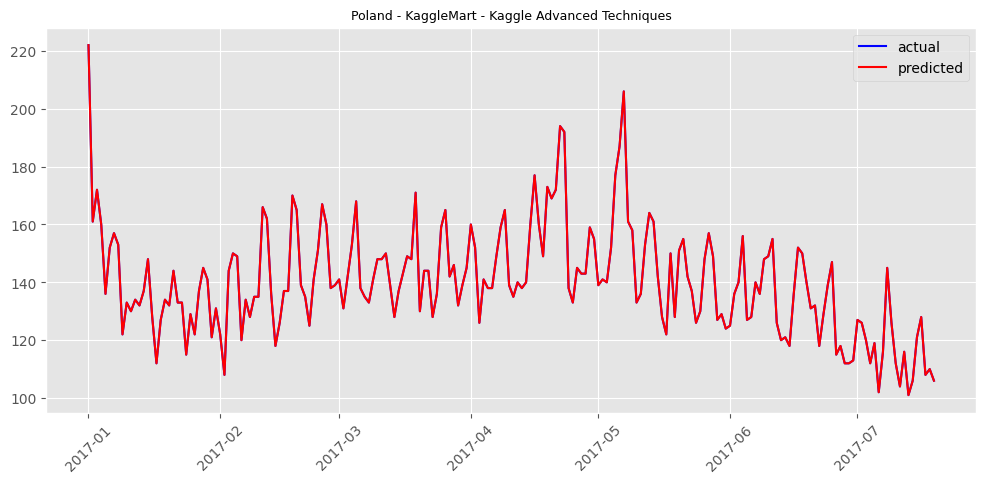

In [61]:
# unique stores
stores = train['store'].unique()
# unique products
products = train['product'].unique()
# unique countries
countries = train['country'].unique()
# multiply by 2.28 to get kagglemart
